Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [46]:
### verify the network connection and accessability 
import pandas_datareader as pdr
key="7354f94be486111c741e613aec63c109a6b301e6"

import pandas_datareader as pdr
from pandas_datareader.tiingo import TiingoDailyReader
from pandas_datareader.tiingo import TiingoQuoteReader
from pandas_datareader import data


# Specify the stock symbol and the start and end dates
# symbol = 'AAPL'
symbol = 'FTNT'
start_date = '2002-01-01'
end_date = '2023-12-31'

try:
    # Attempt to fetch data
    df = pdr.get_data_tiingo(symbol, start=start_date, end=end_date, api_key=key)
    print (df)
    # Do further processing with the data
    # ...
except pdr._utils.RemoteDataError as e:
    print(f"Error: {e}")



split_date = '2022-06-23'   
split_ratio = 5  # Replace with the actual split ratio (e.g., 5:1)
# Apply the adjustment
# @todo df.loc[df.index >= split_date, 'Close'] = df.loc[df.index <= split_date, 'Close'] * split_ratio

/tmp/ipykernel_1173855/463475695.py:19: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo(symbol, start=start_date, end=end_date, api_key=key)


                                     close      high       low      open  \
symbol date                                                                
FTNT   2009-11-18 00:00:00+00:00   16.6200   17.5000   16.3300   17.0000   
       2009-11-19 00:00:00+00:00   16.8900   17.1200   16.0600   16.5700   
       2009-11-20 00:00:00+00:00   16.9400   16.9600   16.0600   16.8800   
       2009-11-23 00:00:00+00:00   16.9000   17.1700   16.6000   17.0600   
       2009-11-24 00:00:00+00:00   17.0100   17.0500   16.7300   16.8000   
       2009-11-25 00:00:00+00:00   17.2000   17.2800   16.9500   17.1500   
       2009-11-27 00:00:00+00:00   16.8900   17.6800   16.7000   16.7700   
       2009-11-30 00:00:00+00:00   16.9900   17.3200   16.8100   17.0500   
       2009-12-01 00:00:00+00:00   16.8200   17.2400   16.6280   17.0000   
       2009-12-02 00:00:00+00:00   16.6200   16.9000   16.1500   16.9000   
       2009-12-03 00:00:00+00:00   16.6800   16.8600   16.5200   16.6200   
       2009-

In [3]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
import pandas as pd

# print(df)
# df = df.sort_values(by='high', ascending=False)
selected_columns = df.iloc[:, 1:7]
pd.set_option('display.max_rows', 10000)
print(selected_columns)




                                      high       low      open    volume  \
symbol date                                                                
FTNT   2009-11-18 00:00:00+00:00   17.5000   16.3300   17.0000  13670400   
       2009-11-19 00:00:00+00:00   17.1200   16.0600   16.5700   2217300   
       2009-11-20 00:00:00+00:00   16.9600   16.0600   16.8800   1139000   
       2009-11-23 00:00:00+00:00   17.1700   16.6000   17.0600   1185800   
       2009-11-24 00:00:00+00:00   17.0500   16.7300   16.8000    467700   
       2009-11-25 00:00:00+00:00   17.2800   16.9500   17.1500    428000   
       2009-11-27 00:00:00+00:00   17.6800   16.7000   16.7700    174000   
       2009-11-30 00:00:00+00:00   17.3200   16.8100   17.0500    433800   
       2009-12-01 00:00:00+00:00   17.2400   16.6280   17.0000    412500   
       2009-12-02 00:00:00+00:00   16.9000   16.1500   16.9000    960200   
       2009-12-03 00:00:00+00:00   16.8600   16.5200   16.6200    569900   
       2009-

In [5]:
df.head()

close   high    low   open    volume  \
symbol date                                                              
FTNT   2009-11-18 00:00:00+00:00  16.62  17.50  16.33  17.00  13670400   
       2009-11-19 00:00:00+00:00  16.89  17.12  16.06  16.57   2217300   
       2009-11-20 00:00:00+00:00  16.94  16.96  16.06  16.88   1139000   
       2009-11-23 00:00:00+00:00  16.90  17.17  16.60  17.06   1185800   
       2009-11-24 00:00:00+00:00  17.01  17.05  16.73  16.80    467700   

                                  adjClose  adjHigh  adjLow  adjOpen  \
symbol date                                                            
FTNT   2009-11-18 00:00:00+00:00     1.662    1.750   1.633    1.700   
       2009-11-19 00:00:00+00:00     1.689    1.712   1.606    1.657   
       2009-11-20 00:00:00+00:00     1.694    1.696   1.606    1.688   
       2009-11-23 00:00:00+00:00     1.690    1.717   1.660    1.706   
       2009-11-24 00:00:00+00:00     1.701    1.705   1.673    1.680   

                                  adjVolume  divCash  splitFactor  
symbol date                                                        
FTNT   2009-11-18 00:00:00+00:00  136704000      0.0          1.0  
       2009-11-19 00:00:00+00:00   22173000      0.0          1.0  
       2009-11-20 00:00:00+00:00   11390000      0.0          1.0  
       2009-11-23 00:00:00+00:00   11858000      0.0          1.0  
       2009-11-24 00:00:00+00:00    4677000      0.0          1.0

In [6]:
df.tail()
print(len(df), df.shape[0])
print(df.shape[1])

3514 3514
12


In [7]:
df1=df.reset_index()['close']

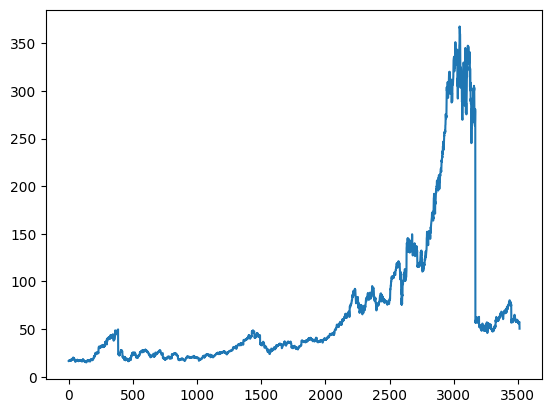

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [10]:
import numpy as np

In [11]:
df1

0        16.6200
1        16.8900
2        16.9400
3        16.9000
4        17.0100
5        17.2000
6        16.8900
7        16.9900
8        16.8200
9        16.6200
10       16.6800
11       17.2800
12       16.9200
13       16.5500
14       16.9900
15       16.9200
16       16.9400
17       17.0000
18       17.0000
19       18.2500
20       17.9500
21       17.5800
22       17.6300
23       17.2300
24       17.9600
25       18.3600
26       17.7300
27       18.3500
28       18.0200
29       17.5700
30       18.0000
31       18.3900
32       19.4100
33       19.4500
34       20.1100
35       20.0500
36       19.7900
37       19.4400
38       19.9000
39       19.6300
40       19.8000
41       19.0600
42       18.3900
43       17.8800
44       18.0100
45       18.3100
46       18.6500
47       17.8000
48       17.2300
49       17.4500
50       17.1300
51       16.4400
52       15.7000
53       15.6900
54       15.9000
55       16.5900
56       16.8600
57       16.6700
58       16.52

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1)) # reshape from one array to 2D array

In [13]:
print(df1)
print(df1.shape[0],df1.shape[1])

[[0.00459353]
 [0.00535912]
 [0.00550089]
 ...
 [0.11997051]
 [0.12076445]
 [0.10060396]]
3514 1


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.85) # with the ratio 85%
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(2986, 528)

In [16]:
train_data

array([[0.00459353],
       [0.00535912],
       [0.00550089],
       ...,
       [0.80973715],
       [0.7737545 ],
       [0.77644824]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)
print(X_train)
print('y_train \n',y_train)
print(y_train.shape)
# print (y_train.shape(1), len(y_train))

(2885, 100)
(2885,)
[[0.00459353 0.00535912 0.00550089 ... 0.00572773 0.00408314 0.0058128 ]
 [0.00535912 0.00550089 0.00538747 ... 0.00408314 0.0058128  0.00413985]
 [0.00550089 0.00538747 0.00569938 ... 0.0058128  0.00413985 0.00340261]
 ...
 [0.54379448 0.55116681 0.54302889 ... 0.8069867  0.81271444 0.8380072 ]
 [0.55116681 0.54302889 0.55794369 ... 0.81271444 0.8380072  0.8418635 ]
 [0.54302889 0.55794369 0.53673406 ... 0.8380072  0.8418635  0.80973715]]
y_train 
 [0.00413985 0.00340261 0.00354439 ... 0.8418635  0.80973715 0.7737545 ]
(2885,)


In [20]:
print(X_test.shape), print(ytest.shape)

(427, 100)
(427,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1) # length and width
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_train
X_test

array([[[0.78555023],
        [0.80244988],
        [0.77656166],
        ...,
        [0.8380072 ],
        [0.82187314],
        [0.80074858]],

       [[0.80244988],
        [0.77656166],
        [0.80392435],
        ...,
        [0.82187314],
        [0.80074858],
        [0.76419883]],

       [[0.77656166],
        [0.80392435],
        [0.81322483],
        ...,
        [0.80074858],
        [0.76419883],
        [0.85476508]],

       ...,

       [[0.15311765],
        [0.15031049],
        [0.15549948],
        ...,
        [0.11546205],
        [0.11699322],
        [0.11716335]],

       [[0.15031049],
        [0.15549948],
        [0.15734256],
        ...,
        [0.11699322],
        [0.11716335],
        [0.11957354]],

       [[0.15549948],
        [0.15734256],
        [0.16014972],
        ...,
        [0.11716335],
        [0.11957354],
        [0.11997051]]])

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-11-05 14:12:49.693872: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 14:12:49.753726: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 14:12:49.753765: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 14:12:49.753805: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 14:12:49.765518: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-05 14:12:49.766308: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

2023-11-05 14:12:50.706764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=2) ##ama len(x_test)/64=45

Epoch 1/100


46/46 - 8s - loss: 0.0035 - val_loss: 0.0105 - 8s/epoch - 177ms/step
Epoch 2/100
46/46 - 4s - loss: 2.2336e-04 - val_loss: 0.0102 - 4s/epoch - 93ms/step
Epoch 3/100
46/46 - 3s - loss: 2.3232e-04 - val_loss: 0.0101 - 3s/epoch - 75ms/step
Epoch 4/100
46/46 - 3s - loss: 1.9026e-04 - val_loss: 0.0092 - 3s/epoch - 74ms/step
Epoch 5/100
46/46 - 4s - loss: 2.0342e-04 - val_loss: 0.0091 - 4s/epoch - 78ms/step
Epoch 6/100
46/46 - 3s - loss: 2.0214e-04 - val_loss: 0.0077 - 3s/epoch - 76ms/step
Epoch 7/100
46/46 - 5s - loss: 1.6761e-04 - val_loss: 0.0071 - 5s/epoch - 100ms/step
Epoch 8/100
46/46 - 5s - loss: 1.7834e-04 - val_loss: 0.0073 - 5s/epoch - 115ms/step
Epoch 9/100
46/46 - 4s - loss: 1.7094e-04 - val_loss: 0.0078 - 4s/epoch - 76ms/step
Epoch 10/100
46/46 - 4s - loss: 1.5430e-04 - val_loss: 0.0060 - 4s/epoch - 78ms/step
Epoch 11/100
46/46 - 3s - loss: 1.8124e-04 - val_loss: 0.0054 - 3s/epoch - 74ms/step
Epoch 12/100
46/46 - 3s - loss: 1.4835e-04 - val_loss: 0.0054 - 3s/epoch - 72ms/step
Ep

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.14.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

14/14 [==============================] - 0s 16ms/step


In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

78.91228534131015

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

144.75289518169367

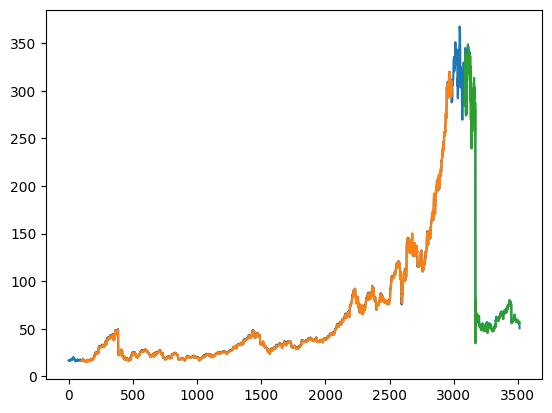

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

528

In [35]:
x_input=test_data[len(test_data)-100:].reshape(1,-1) # locate the last 100 to reshape
x_input.shape


(1, 100)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input
len(temp_input)

100

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        print('iiii, len>100, for prediction',i)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        print ('iii, len<100',i)
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

iii, len<100 0
[0.10539572]
101
iiii, len>100 1
1 day input [0.16613265 0.16383588 0.16066011 0.15910058 0.16122721 0.16046162
 0.1589588  0.16633113 0.16823092 0.17038591 0.17180367 0.16916664
 0.16817421 0.16913829 0.16922335 0.17824028 0.17954462 0.1750078
 0.17933195 0.18124592 0.18510222 0.1849888  0.18059376 0.1777866
 0.17909093 0.17656733 0.17960133 0.17653897 0.17461083 0.17523464
 0.17784331 0.17872232 0.16820257 0.17228571 0.11843933 0.12107636
 0.12354326 0.12697423 0.12918592 0.12669067 0.12663396 0.12524456
 0.12243741 0.12025406 0.11954518 0.12303286 0.12283438 0.12530127
 0.12235234 0.12422378 0.12391187 0.12938441 0.13105736 0.1281935
 0.13006493 0.13301387 0.13392123 0.13658661 0.13913857 0.14197408
 0.13752233 0.13502708 0.13638812 0.13049026 0.12887402 0.12884566
 0.12802336 0.12413871 0.12260754 0.12223892 0.12031077 0.12232399
 0.12362832 0.12385516 0.12371339 0.12082116 0.12266425 0.12198372
 0.12739955 0.12620864 0.12589673 0.12467746 0.12192701 0.12124649
 0.12

23 day output [[0.08200265]]
iiii, len>100 24
24 day input [0.1777866  0.17909093 0.17656733 0.17960133 0.17653897 0.17461083
 0.17523464 0.17784331 0.17872232 0.16820257 0.17228571 0.11843933
 0.12107636 0.12354326 0.12697423 0.12918592 0.12669067 0.12663396
 0.12524456 0.12243741 0.12025406 0.11954518 0.12303286 0.12283438
 0.12530127 0.12235234 0.12422378 0.12391187 0.12938441 0.13105736
 0.1281935  0.13006493 0.13301387 0.13392123 0.13658661 0.13913857
 0.14197408 0.13752233 0.13502708 0.13638812 0.13049026 0.12887402
 0.12884566 0.12802336 0.12413871 0.12260754 0.12223892 0.12031077
 0.12232399 0.12362832 0.12385516 0.12371339 0.12082116 0.12266425
 0.12198372 0.12739955 0.12620864 0.12589673 0.12467746 0.12192701
 0.12124649 0.1251595  0.1237701  0.12099129 0.12127485 0.11727677
 0.11653954 0.12062268 0.11608586 0.11546205 0.11699322 0.11716335
 0.11957354 0.11997051 0.12076445 0.10060396 0.10539572 0.10148623
 0.10067559 0.09951922 0.09819116 0.09701233 0.0959804  0.09503642
 0.

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

3514

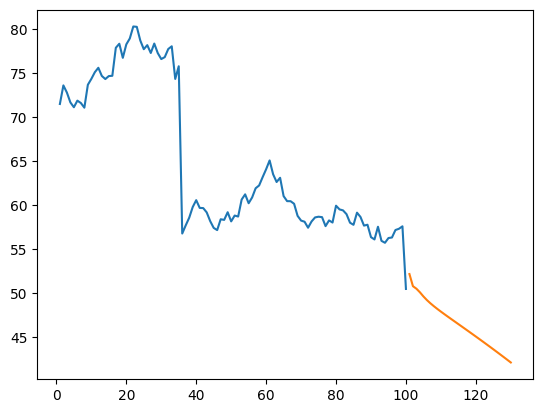

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

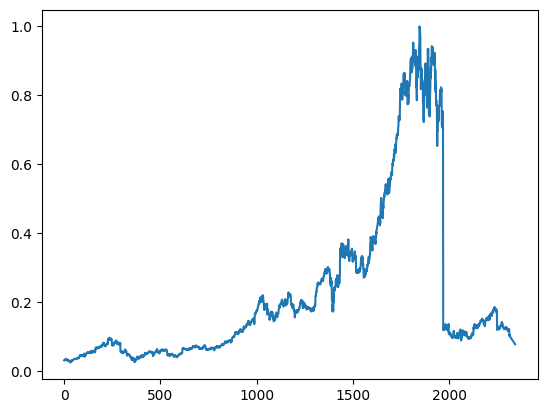

In [43]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [44]:
df3=scaler.inverse_transform(df3).tolist()

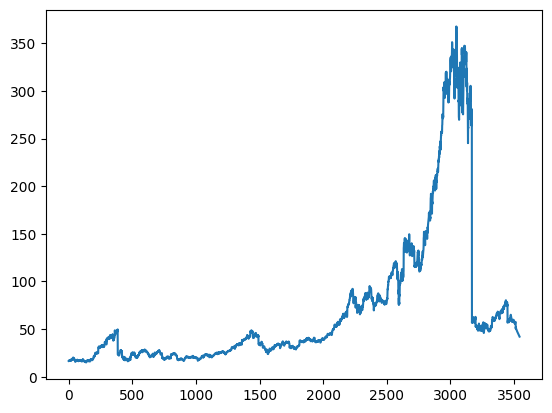

In [45]:
plt.plot(df3)